# Blending signatures and checks

In [119]:
import numpy as np
import os
from skimage import io
from skimage import color
from skimage import transform
from skimage.util import crop

In [149]:
# load a signature
test_sig = io.imread('data/utsig/genuine/001/C001G01.PNG')

# load a cheque
test_cheque = io.imread('data/checks/cheque2.jpg')

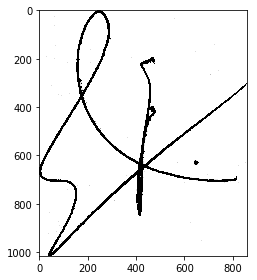

In [150]:
# display the sig before blending
io.imshow(test_sig, cmap='gray')

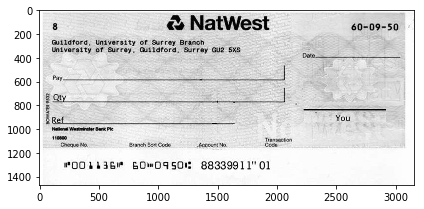

In [151]:
# display the cheque before blending
io.imshow(test_cheque)

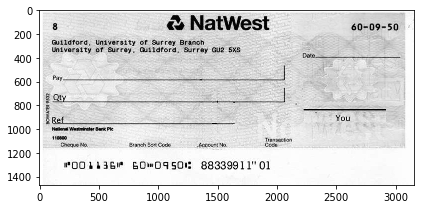

In [152]:
# convert the cheque to grayscale
test_cheque = color.rgb2gray(test_cheque)

# display the grayscale cheque
io.imshow(test_cheque)

(1016, 858)


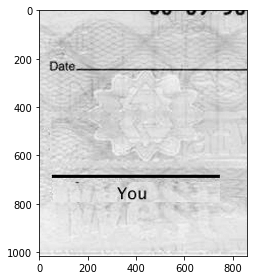

In [153]:
# crop the cheque

# center of signing area for each check
c_col = [1800, 2602, 2067, 2713, 2077, 2638, 2287, 2195, 2071, 2164, 2890, 2264, 2300, 2055, 2785, 2586, 1286, 1285, 2472, 699]
c_row = [1215, 659, 979, 1269, 834, 1087, 965, 767, 805, 836, 1189, 1140, 783, 1807, 1479, 452, 393, 376, 1877, 683]

cheque_index = 1
test_cheque_cropped = crop(
    test_cheque,
    ((c_row[cheque_index] - test_sig.shape[0]/2, test_cheque.shape[0] - c_row[cheque_index] - test_sig.shape[0]/2), 
    (c_col[cheque_index] - test_sig.shape[1]/2, test_cheque.shape[1] - c_col[cheque_index] - test_sig.shape[1]/2))
)

print test_cheque_cropped.shape

# display the cropped cheque
io.imshow(test_cheque_cropped)

In [154]:
if np.amax(test_sig) == 1:
    test_sig *= 255
if np.amax(test_cheque_cropped) == 1:
    test_cheque_cropped *= 255

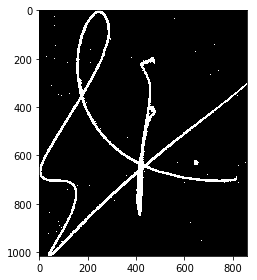

In [155]:
# apply thresholding to get the binary sig
th_test_sig = np.empty(test_sig.shape)
th_test_sig[test_sig>222] = 0
th_test_sig[test_sig<=222] = 1

# display binary sig
io.imshow(th_test_sig)

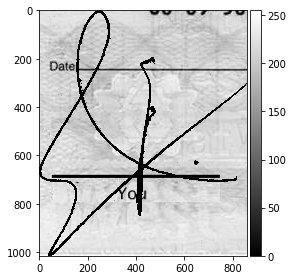

In [156]:
# blend
blended = np.empty(test_cheque_cropped.shape, dtype='int32')

for row in range(blended.shape[0]):
    for col in range(blended.shape[1]):
        if th_test_sig[row][col] == 0:
            blended[row][col] = test_cheque_cropped[row][col]
        else:
            blended[row][col] = test_cheque_cropped[row][col] * test_sig[row][col] / 255

# display synthetic image
io.imshow(blended, cmap='gray')